In [1]:
import numpy as np #Linear Algebra
import pandas as pd #Data Processing

In [2]:
#Show all columns and rows to understand the Dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#Statistical and Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Importing some preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Importing all models to be used
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [7]:
# Importing libraries to check model metrics and also K fold cross validation score
import sklearn.metrics as metrics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

In [8]:
#Reading Dataset and checking top 5 entries
df = pd.read_csv("D:\Data Science\Datasets\iphone_purchase_records.csv")
df.head()
#rows and columns
df.shape

(400, 4)

In [9]:
#Checking the datatypes of all features
df.info()
#Finding total number of null values
df.isna().sum()
#Generate descriptive statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 11.0+ KB


,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [11]:
# Making last column (Purchase Iphone) as output 'y' and the rest columns as input 'X'
X = df.iloc[:,:-1].values
y = df.iloc[:, 3].values

In [12]:
# converting gender to number
labelEncoder_gender = LabelEncoder()
X[:,0] = labelEncoder_gender.fit_transform(X[:,0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [13]:
#feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression

In [14]:
lr = LogisticRegression(random_state=0, solver="liblinear")
lr.fit(X_train, y_train) #Training the model on training dataset
y_pred_lr = lr.predict(X_test) #Predicting values of the test dataset
y_pred_lr #Predicted values for logistic regression

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [16]:
# Finding K fold cross validation score for Logistic Regression Model
scores_lr = cross_val_score(lr, X_test, y_test,cv = 5,scoring='accuracy')
print(scores_lr)
print("Logistic Regression model has %0.2f accuracy with a standard deviation of %0.2f" % (scores_lr.mean(), scores_lr.std()))

[0.9  0.95 0.85 0.85 0.8 ]
Logistic Regression model has 0.87 accuracy with a standard deviation of 0.05


F1 score: 0.893855
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        68
           1       0.90      0.81      0.85        32

    accuracy                           0.91       100
   macro avg       0.91      0.88      0.89       100
weighted avg       0.91      0.91      0.91       100

precision score: 0.906022
recall score: 0.884191
Accuracy:0.910000


<AxesSubplot:>

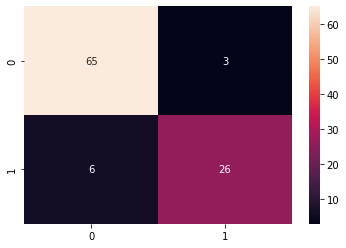

In [17]:
# Model metrics - other form of checking model quality
f1_score_lr = metrics.f1_score(y_test,y_pred_lr,average='macro')
print('F1 score: {0:f}'.format (f1_score_lr))
print(classification_report(y_test,y_pred_lr))
slr = precision_score(y_test, y_pred_lr, average='macro')
print('precision score: {0:f}'.format (slr))
s_lr = recall_score(y_test,y_pred_lr, average='macro')
print('recall score: {0:f}'.format (s_lr))
score_lr = metrics.accuracy_score(y_test,lr.predict(X_test))
print('Accuracy:{0:f}'.format(score_lr))
sns.heatmap(confusion_matrix(y_test,y_pred_lr),annot=True)

### K Nearest Neighbour

In [18]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train) #Training the model on training dataset
y_pred_knn = knn.predict(X_test) #Predicting values of the test dataset
y_pred_knn #Predicted values for KNN

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [19]:
# Finding K fold cross validation score for KNN Model
scores_knn = cross_val_score(knn, X_test, y_test,cv = 5,scoring='accuracy')
print(scores_knn)
print("KNN model has %0.2f accuracy with a standard deviation of %0.2f"% (scores_knn.mean(), scores_knn.std()))


[0.85 0.9  0.85 0.75 0.7 ]
KNN model has 0.81 accuracy with a standard deviation of 0.07


F1 score: 0.920228
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100

precision score: 0.917006
recall score: 0.923713
Accuracy:0.930000


<AxesSubplot:>

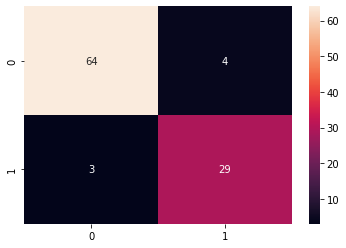

In [20]:
# Model metrics - other form of checking model quality
f1_score_knn = metrics.f1_score(y_test,y_pred_knn,average='macro')
print('F1 score: {0:f}'.format (f1_score_knn))
print(classification_report(y_test,y_pred_knn))
sknn = precision_score(y_test, y_pred_knn, average='macro')
print('precision score: {0:f}'.format (sknn))
s_knn = recall_score(y_test,y_pred_knn, average='macro')
print('recall score: {0:f}'.format (s_knn))
score_knn = metrics.accuracy_score(y_test,knn.predict(X_test))
print('Accuracy:{0:f}'.format(score_knn))
sns.heatmap(confusion_matrix(y_test,y_pred_knn),annot=True)

### Random Forest

In [21]:
rf = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1, min_samples_leaf=30)
rf.fit(X_train, y_train) #Training the model on training dataset
y_pred_rf = rf.predict(X_test) #Predicting values of the test dataset
y_pred_rf #Predicted values for Random Forest

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [23]:
# Finding K fold cross validation score for Random Forest Model
scores_rf = cross_val_score(rf, X_test, y_test,cv = 5,scoring='accuracy')
print(scores_rf)
print("Random Forest model has %0.2f accuracy with a standard deviationof %0.2f" % (scores_rf.mean(), scores_rf.std()))

[0.7  0.7  0.7  0.65 0.65]
Random Forest model has 0.68 accuracy with a standard deviationof 0.02


F1 score: 0.932157
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.88      0.94      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100

precision score: 0.926025
recall score: 0.939338
Accuracy:0.940000


<AxesSubplot:>

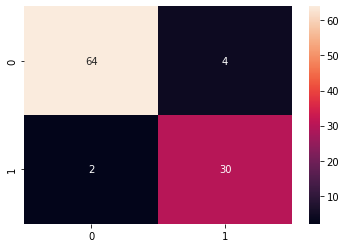

In [24]:
#Model metrics - other form of checking model quality
f1_score_rf = metrics.f1_score(y_test,y_pred_rf,average='macro')
print('F1 score: {0:f}'.format (f1_score_rf))
print(classification_report(y_test,y_pred_rf))
srf = precision_score(y_test, y_pred_rf, average='macro')
print('precision score: {0:f}'.format (srf))
s_rf = recall_score(y_test,y_pred_rf, average='macro')
print('recall score: {0:f}'.format (s_rf))
score_rf = metrics.accuracy_score(y_test,rf.predict(X_test))
print('Accuracy:{0:f}'.format(score_rf))
sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True)

### K fold cross Validation

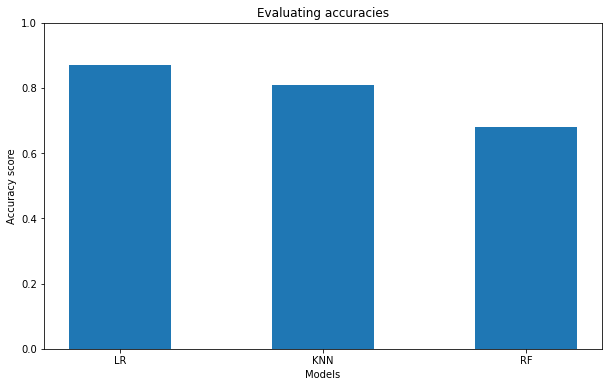

In [25]:
# Comparing K fold cross validation score of all the 6 models.
# Plotting/Visual Comparison makes it easier to compare
algo = ['LR','KNN','RF']
score = [scores_lr.mean(), scores_knn.mean(), scores_rf.mean()]
plt.figure(figsize=(10,6))
plt.bar(algo,score,width=0.5)
plt.title('Evaluating accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy score')
plt.ylim(0,1)
plt.show()
